In [1]:
import pandas as pd

## Well Tops Formatting

In [6]:
df=pd.read_excel("./Tops.xlsx",sheet_name="Sheet1")

In [7]:
df.head()

Well  Surface        X m         Y m  TVDSS m   MD m   TWT ms
0  7122/07-01   Seabed  547217.40  7910064.40  -381.00  405.0   515.00
1  7122/07-01    Torsk  547216.89  7910064.10  -449.00  473.0   579.24
2  7122/07-01  Kviting  547214.72  7910062.18  -561.96  586.0   688.90
3  7122/07-01  Kolmule  547213.35  7910061.65  -628.94  653.0   749.68
4  7122/07-01    Knurr  547202.93  7910062.37  -959.77  984.0  1030.22

In [8]:
output=df[['X m','Y m','TVDSS m','MD m','TWT ms','Well','Surface']]

In [17]:
output.head()

X m         Y m  TVDSS m   MD m   TWT ms        Well  Surface
0  547217.40  7910064.40  -381.00  405.0   515.00  7122/07-01   Seabed
1  547216.89  7910064.10  -449.00  473.0   579.24  7122/07-01    Torsk
2  547214.72  7910062.18  -561.96  586.0   688.90  7122/07-01  Kviting
3  547213.35  7910061.65  -628.94  653.0   749.68  7122/07-01  Kolmule
4  547202.93  7910062.37  -959.77  984.0  1030.22  7122/07-01    Knurr

In [18]:
output.to_csv("./output/TopsPetrel.dat",sep='\t',index=False)

## Checkshots

In [19]:
checkshots=pd.read_excel("./VSPs_Checkshots.xlsx",sheet_name="Sheet2")

In [20]:
checkshots.head()

TVDSS    TWT  Average velocity  Interval velocity  Sonic time  \
0    0.00    0.0               NaN            1479.58        0.00   
1  380.99  515.0           1479.58            2117.13      145.10   
2  515.96  642.5           1606.10            1959.94      196.51   
3  535.95  662.9           1616.99            2009.41      204.12   
4  555.95  682.8           1628.43            1969.98      211.74   

   Sonic Int. Vel   Drift        Well  
0             NaN    0.00  7122/07-01  
1         2625.81 -112.40  7122/07-01  
2         2625.22 -124.74  7122/07-01  
3         2624.73 -127.33  7122/07-01  
4         2625.02 -129.66  7122/07-01

In [21]:
wells=checkshots['Well'].unique()
print(wells)

['7122/07-01' '7122/07-02' '7122/07-06' '7122/07-05' '7122/07-03'
 '7122/07-04S']


In [22]:
for a in wells:
    subset=checkshots.loc[(checkshots['Well']==a)]
    name=str(a)[5:10]
    print(name)
    subset.to_csv("./output/"+name+".data",sep='\t',index=False)

07-01
07-02
07-06
07-05
07-03
07-04


In [65]:
import matplotlib.pyplot as plt

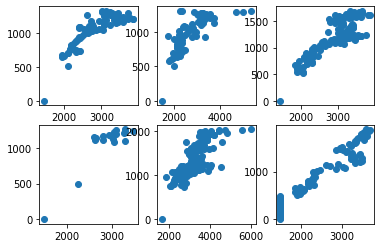

In [72]:
mylist=checkshots['Well'].unique()

for i in range(len(mylist)):
    plt.subplot(2,3,i+1)
    logs_filtered=checkshots.loc[(checkshots["Well"] == mylist[i])] 
    plt.scatter(logs_filtered['Interval velocity'],logs_filtered['TWT'])
    plt.

## Data Collection


In [81]:
wells=pd.read_csv("https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=62.92.121.39&CultureCode=en")

In [82]:
wells.head()

wlbWellboreName wlbWell          wlbDrillingOperator wlbProductionLicence  \
0           1/2-1   1/2-1  Phillips Petroleum Norsk AS                 143    
1           1/2-2   1/2-2   Paladin Resources Norge AS               143 CS   
2           1/3-1   1/3-1             A/S Norske Shell                 011    
3           1/3-2   1/3-2             A/S Norske Shell                 011    
4           1/3-3   1/3-3       Elf Petroleum Norge AS                 065    

  wlbPurpose wlbStatus wlbContent  wlbWellType wlbSubSea wlbEntryDate  \
0    WILDCAT       P&A        OIL  EXPLORATION        NO   20.03.1989   
1    WILDCAT       P&A  OIL SHOWS  EXPLORATION        NO   14.12.2005   
2    WILDCAT       P&A        GAS  EXPLORATION        NO   06.07.1968   
3    WILDCAT       P&A        DRY  EXPLORATION        NO   14.05.1969   
4    WILDCAT       P&A        OIL  EXPLORATION        NO   22.08.1982   

      ...      wlbNpdidWellbore dscNpdidDiscovery fldNpdidField  \
0     ...                  1382           43814.0     3437650.0   
1     ...                  5192               NaN           NaN   
2     ...                   154           43820.0           NaN   
3     ...                   165               NaN           NaN   
4     ...                    87           43826.0     1028599.0   

  fclNpdidFacilityDrilling wlbNpdidWellboreReclass  prlNpdidProductionLicence  \
0                 296245.0                       0                      21956   
1                 278245.0                       0                    2424919   
2                 288604.0                       0                      20844   
3                 288847.0                       0                      20844   
4                 288334.0                       0                      21316   

  wlbNpdidSiteSurvey wlbDateUpdated  wlbDateUpdatedMax  datesyncNPD  
0                NaN     03.10.2019         03.10.2019   31.10.2019  
1                NaN     03.10.2019         03.10.2019   31.10.2019  
2                NaN     03.10.2019         03.10.2019   31.10.2019  
3                NaN     03.10.2019         03.10.2019   31.10.2019  
4                NaN     03.10.2019         03.10.2019   31.10.2019  

[5 rows x 87 columns]

In [83]:
wells.columns

Index(['wlbWellboreName', 'wlbWell', 'wlbDrillingOperator',
       'wlbProductionLicence', 'wlbPurpose', 'wlbStatus', 'wlbContent',
       'wlbWellType', 'wlbSubSea', 'wlbEntryDate', 'wlbCompletionDate',
       'wlbField', 'wlbDrillPermit', 'wlbDiscovery', 'wlbDiscoveryWellbore',
       'wlbBottomHoleTemperature', 'wlbSiteSurvey', 'wlbSeismicLocation',
       'wlbMaxInclation', 'wlbKellyBushElevation', 'wlbFinalVerticalDepth',
       'wlbTotalDepth', 'wlbWaterDepth', 'wlbKickOffPoint', 'wlbAgeAtTd',
       'wlbFormationAtTd', 'wlbMainArea', 'wlbDrillingFacility',
       'wlbFacilityTypeDrilling', 'wlbDrillingFacilityFixedOrMoveable',
       'wlbLicensingActivity', 'wlbMultilateral', 'wlbPurposePlanned',
       'wlbEntryYear', 'wlbCompletionYear', 'wlbReclassFromWellbore',
       'wlbReentryExplorationActivity', 'wlbPlotSymbol', 'wlbFormationWithHc1',
       'wlbAgeWithHc1', 'wlbFormationWithHc2', 'wlbAgeWithHc2',
       'wlbFormationWithHc3', 'wlbAgeWithHc3', 'wlbDrillingDays', 'wlbRee

In [84]:
wells[['wlbWellboreName', 'wlbWell','wlbNsUtm','wlbEwUtm']].head()

wlbWellboreName wlbWell    wlbNsUtm   wlbEwUtm
0           1/2-1   1/2-1  6305128.26  468106.29
1           1/2-2   1/2-2  6316774.33  469410.10
2           1/3-1   1/3-1  6301488.86  490936.87
3           1/3-2   1/3-2  6310443.20  484786.28
4           1/3-3   1/3-3  6312226.32  498885.66

In [85]:
well_list=["6705/10-1","6707/10-1"]
print(well_list)

['6705/10-1', '6707/10-1']


In [86]:
data=wells[wells['wlbWellboreName'].isin(well_list)]

In [87]:
data[['wlbWellboreName', 'wlbWell','wlbNsUtm','wlbEwUtm']]

wlbWellboreName    wlbWell    wlbNsUtm   wlbEwUtm
1745       6705/10-1  6705/10-1  7435225.68  600057.62
1753       6707/10-1  6707/10-1  7440629.70  413490.42

In [88]:
tops_pd=pd.read_csv("https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=62.92.121.39&CultureCode=en")

In [92]:
tops_pd[tops_pd['wlbName'].isin(well_list)].head()

wlbName  lsuTopDepth  lsuBottomDepth       lsuName   lsuLevel  \
33695  6705/10-1         1358            1525      NAUST FM  FORMATION   
33696  6705/10-1         1358            2005   NORDLAND GP      GROUP   
33697  6705/10-1         1525            2005        KAI FM  FORMATION   
33698  6705/10-1         2005            2718  HORDALAND GP      GROUP   
33699  6705/10-1         2005            2718     BRYGGE FM  FORMATION   

       lsuNpdidLithoStrat wlbCompletionDate  wlbNpdidWellbore  \
33695                 109        19.03.2009              6044   
33696                 113        19.03.2009              6044   
33697                  77        19.03.2009              6044   
33698                  67        19.03.2009              6044   
33699                  18        19.03.2009              6044   

      IsuWellboreUpdatedDate datesyncNPD  
33695             03.10.2019  31.10.2019  
33696             03.10.2019  31.10.2019  
33697             03.10.2019  31.10.2019  
33698             03.10.2019  31.10.2019  
33699             03.10.2019  31.10.2019